# ANALYSIS

## Analisi per "OutletSales"

In [38]:
#voglio individuare i prodotti, le categorie e gli outlet con il maggior OutletSales (fatturato nel periodo di riferimento)
# TOP 10 PRODOTTI
product_sales=df.groupby("ProductID")["OutletSales"].sum().sort_values(ascending=False)
top10_products=product_sales.head(10)
print("Top 10",top10_products)

Top 10 ProductID
FDY55    42661.81
FDA15    41584.54
FDZ20    40185.02
FDF05    36555.75
FDA04    35741.49
FDK03    34843.98
NCQ06    34680.20
NCQ53    34508.41
FDJ55    33531.01
FDD44    32723.41
Name: OutletSales, dtype: float64


In [39]:
# importo una formattazione che mi permette di migliorare la visualizzazione nei grafici dei valori di OutletSales
# (è una trasformazione che porta le migliaia in k e i milioni in M)
from matplotlib.ticker import FuncFormatter

def sales_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}k'
    else:
        return f'{x:.0f}'
# questo lo applica in base a quale asse è presente
def format_sales_axis(ax, axis='x'):
    formatter = FuncFormatter(sales_formatter)
    if axis == 'x':
        ax.xaxis.set_major_formatter(formatter)
    elif axis == 'y':
        ax.yaxis.set_major_formatter(formatter)

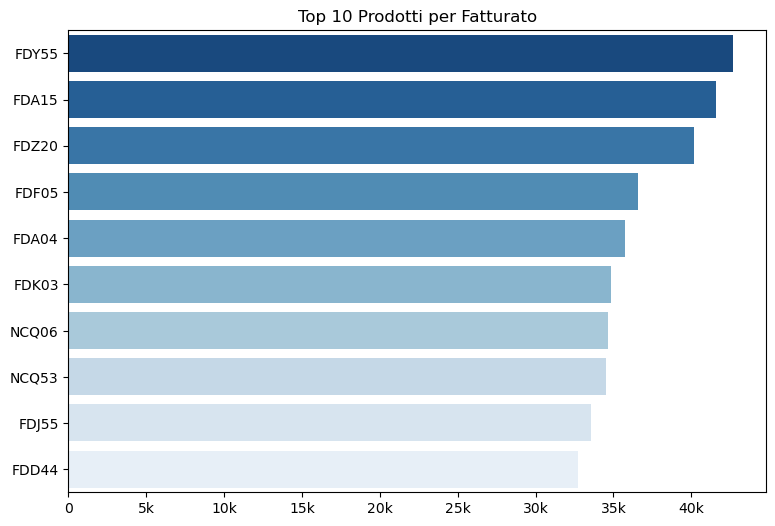

In [40]:
#creazione del grafico
top10_products_plot=top10_products.reset_index()
plt.figure(figsize=(9,6))
sns.barplot(x="OutletSales", y="ProductID", data=top10_products_plot, hue="ProductID", palette="Blues_r")
ax = plt.gca()
format_sales_axis(ax, axis='x')
plt.title("Top 10 Prodotti per Fatturato")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [41]:
# verifico la regola di Pareto, ovvero l'euristica secondo la quale l'80% del fatturato è generato dal 20% delle cause
pareto_products = df.groupby('ProductID')['OutletSales'].sum().sort_values(ascending=False).reset_index()

pareto_products['CumSales'] = pareto_products['OutletSales'].cumsum()
total_sales = pareto_products['OutletSales'].sum()

pareto_products['CumPerc'] = pareto_products['CumSales'] / total_sales * 100

In [42]:
fatt_pareto_80=pareto_products[pareto_products['CumPerc'] <= 80].shape[0] / pareto_products.shape[0]
fatt_pareto_80

0.5772931366260423

In [43]:
# in questo caso, si arriva al 80% del fatturato grazie al 57.7% dei prodotti con OutletSales maggiore

In [44]:
# FATTURATO PER CATEGORIA
category_sales=df.groupby("ProductType")["OutletSales"].sum().sort_values(ascending=False)
category_sales

ProductType
Fruits and Vegetables    2820059.87
Snack Foods              2732786.09
Household                2055493.85
Frozen Foods             1825734.96
Dairy                    1522594.03
Canned                   1444151.53
Baking Goods             1265525.36
Health and Hygiene       1045200.08
Meat                      917565.48
Soft Drinks               892897.63
Breads                    553237.21
Hard Drinks               457793.44
Starchy Foods             351401.26
Others                    325517.58
Breakfast                 232298.98
Seafood                   148868.17
Name: OutletSales, dtype: float64

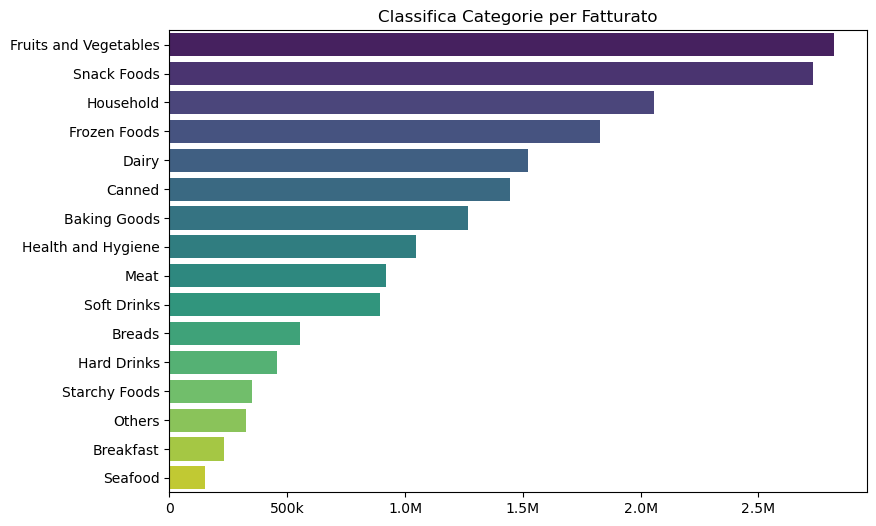

In [45]:
# Creazione del grafico
category_sales_plot = category_sales.reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='OutletSales', y='ProductType', data=category_sales_plot, hue='ProductType', palette='viridis')
ax = plt.gca()
format_sales_axis(ax, axis='x')
plt.title("Classifica Categorie per Fatturato")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

In [46]:
# verifico la regola di Pareto 80/20
pareto_product_type = df.groupby('ProductType')['OutletSales'].sum().sort_values(ascending=False).reset_index()

pareto_product_type['CumSales'] = pareto_product_type['OutletSales'].cumsum()
total_sales = pareto_product_type['OutletSales'].sum()

pareto_product_type['CumPerc'] = pareto_product_type['CumSales'] / total_sales * 100
pareto_product_type[pareto_product_type['CumPerc'] <= 80].shape[0] / pareto_product_type.shape[0]

0.5

In [47]:
#fatturato per outlet
store_sales=df.groupby("OutletID")["OutletSales"].sum().sort_values(ascending=False)
store_sales

OutletID
OUT027    3453925.90
OUT035    2268122.99
OUT049    2183969.83
OUT017    2167465.48
OUT013    2142663.55
OUT046    2118395.22
OUT045    2036725.52
OUT018    1851822.81
OUT010     188340.12
OUT019     179694.10
Name: OutletSales, dtype: float64

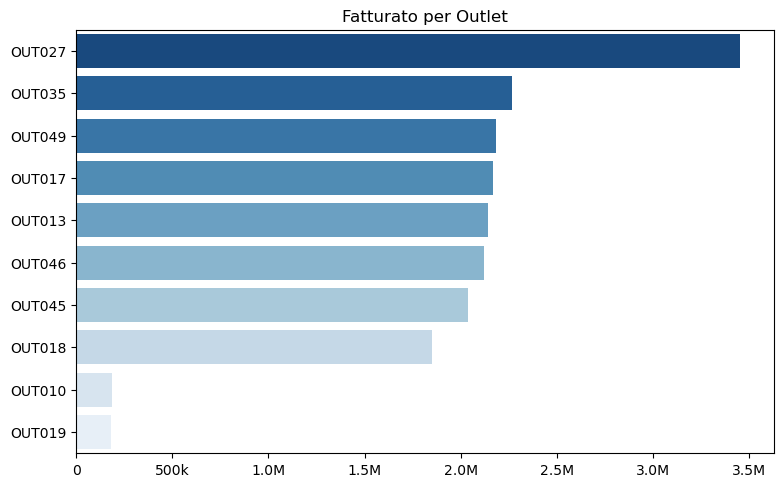

In [48]:
# Creazione del grafico
store_sales_plot = store_sales.reset_index()

plt.figure(figsize=(9, 5.5))
sns.barplot(x='OutletSales', y='OutletID', data=store_sales_plot, hue='OutletID', palette='Blues_r')
ax = plt.gca()
format_sales_axis(ax, axis='x')
plt.title("Fatturato per Outlet")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

In [49]:
# verifico la regola di Pareto 80/20
pareto_outlet = df.groupby('OutletID')['OutletSales'].sum().sort_values(ascending=False).reset_index()

pareto_outlet['CumSales'] = pareto_outlet['OutletSales'].cumsum()
total_sales = pareto_outlet['OutletSales'].sum()

pareto_outlet['CumPerc'] = pareto_outlet['CumSales'] / total_sales * 100
pareto_outlet[pareto_outlet['CumPerc'] <= 80].shape[0] / pareto_outlet.shape[0]

0.6

In [50]:
# ora voglio calcolare la performance degli store in base agli SKU
# Raggruppiamo per Outlet e calcoliamo fatturato e SKU unici per ognuno
outlet_stats = df.groupby('OutletID').agg(Fatturato_Outlet=('OutletSales', 'sum'),Num_SKU_Outlet=('ProductID', 'nunique'))

# Calcoliamo la metrica per ogni outlet
outlet_stats['Sales_per_SKU'] = (outlet_stats['Fatturato_Outlet'] / outlet_stats['Num_SKU_Outlet']).round(2)
media_benchmark = outlet_stats['Sales_per_SKU'].mean()
outlet_stats['Productivity_Index'] = (outlet_stats['Sales_per_SKU'] / media_benchmark).round(2)
outlet_stats_desc=outlet_stats.sort_values(by="Productivity_Index", ascending=False)
outlet_stats_desc

,Fatturato_Outlet,Num_SKU_Outlet,Sales_per_SKU,Productivity_Index
OutletID,,,,
OUT027,3453925.90,935,3694.04,1.82
OUT035,2268122.99,930,2438.84,1.20
OUT049,2183969.83,930,2348.35,1.16
OUT017,2167465.48,926,2340.68,1.15
OUT013,2142663.55,932,2299.00,1.13
OUT046,2118395.22,930,2277.84,1.12
OUT045,2036725.52,929,2192.38,1.08
OUT018,1851822.81,928,1995.50,0.98
OUT010,188340.12,555,339.35,0.17


In [51]:
# da questa tabella si nota come OUT027 sia lo store con la performance migliore.
# tutti gli store con Productivity_Index >1 si comportano meglio della media, con OUT018 di poco sotto
# gli store OUT019 e OUT010 sono i peggiori in termini di performance, cioè i prodotti al loro interno sotto-performano
# in termini di medie. Per quanto siano Grocery Store si dovrebbe comunque valutare un'ottimizzazione dell'assortimento

In [52]:
#posso espandere l'analisi del fatturato anche al tipo di outlet e alla locazione 
#OutlesSales per tipologia
outlet_type_sales=df.groupby("OutletType")["OutletSales"].sum().sort_values(ascending=False)
outlet_type_sales

OutletType
Supermarket Type1    12917342.59
Supermarket Type3     3453925.90
Supermarket Type2     1851822.81
Grocery Store          368034.22
Name: OutletSales, dtype: float64

In [53]:
# i supermarket di tipo1 generano un fatturato di 13 Milioni

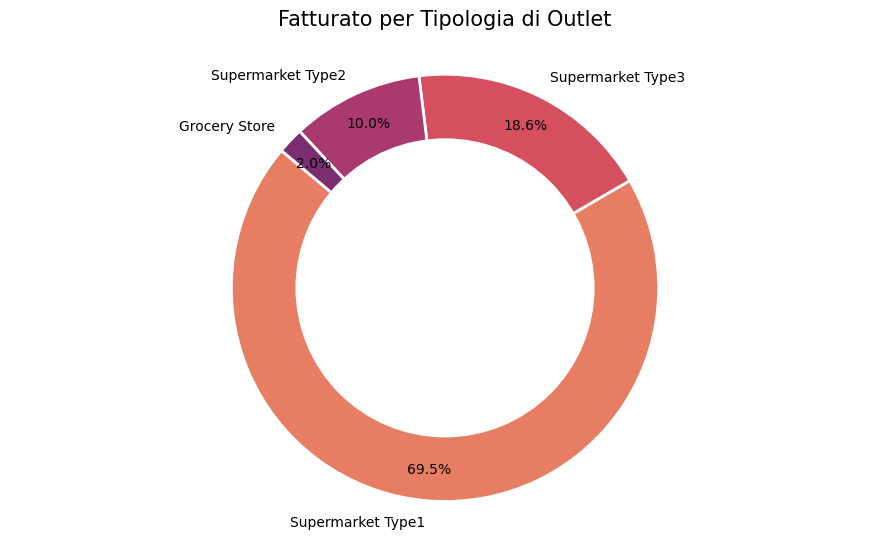

In [54]:
#creazione del grafico a torta
plt.figure(figsize=(9, 5.5))
colors = sns.color_palette("flare", n_colors=len(outlet_type_sales))

plt.pie(
    outlet_type_sales, 
    labels=outlet_type_sales.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2})

#Aggiunta di un cerchio al centro per renderlo un "Donut Chart"
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fatturato per Tipologia di Outlet", fontsize=15, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [55]:
#OutletSales per locazione
location_type_sales=df.groupby("LocationType")["OutletSales"].sum().sort_values(ascending=False)
location_type_sales

LocationType
Tier 3    7636752.38
Tier 2    6472313.99
Tier 1    4482059.15
Name: OutletSales, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 3'), Text(1, 0, 'Tier 2'), Text(2, 0, 'Tier 1')])

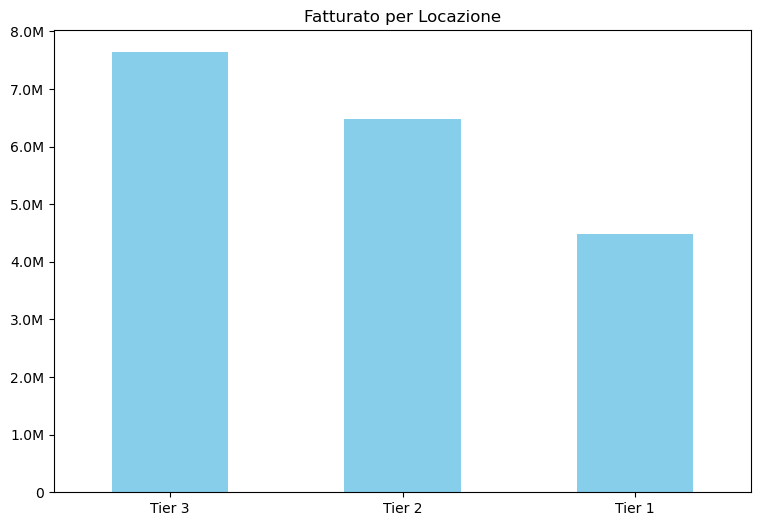

In [56]:
#creazione del grafico (veloce)
plt.figure(figsize=(9,6))
location_type_sales.plot(kind="bar", color="skyblue")
ax = plt.gca()
format_sales_axis(ax, axis='y')
plt.title("Fatturato per Locazione")
plt.xlabel("")
plt.xticks(rotation=0)

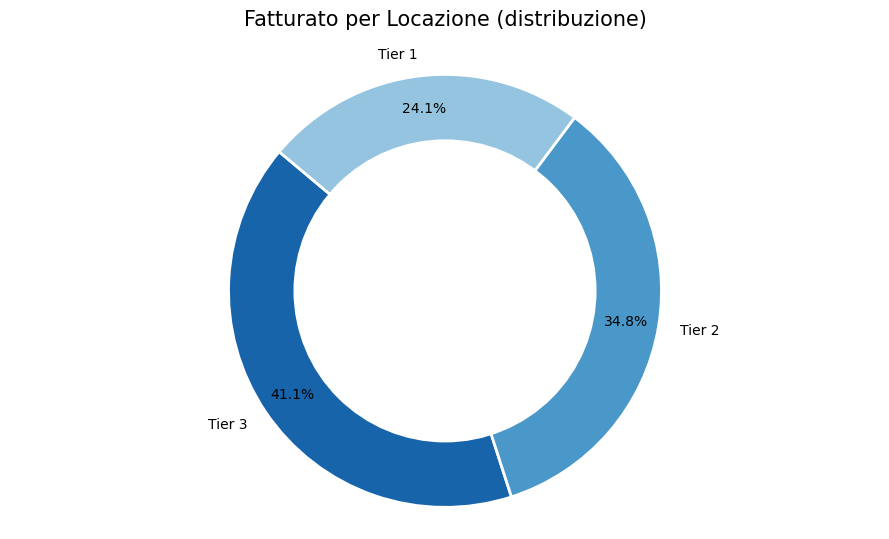

In [57]:
#creazione del grafico a torta
plt.figure(figsize=(9, 5.5))
colors = sns.color_palette("Blues_r", n_colors=len(outlet_type_sales))

plt.pie(
    location_type_sales, 
    labels=location_type_sales.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2})

#Aggiunta di un cerchio al centro per renderlo un "Donut Chart"
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fatturato per Locazione (distribuzione)", fontsize=15, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [58]:
# Risultati analisi preliminare del fatturato:
# “Il prodotto FDY55 è il principale generatore di OutletSales con 42661$, secondo FDA15 con 41584$ e terzo FDZ20 con 40185$ ;
# la categoria Fruits and Vegetables contribuisce maggiormente al fatturato totale con 2.8M$, segue Snack Foods con 2.7M$ ;
# l'outlet che genera più incassi è OUT027 (3.4M$), i due con meno incassi sono OUT010 (188k$) e OUT019 (179k$)
# i Supermarket Type1 sono il formato più performante (12.9M$) ben il 69.5% del totale;
# gli outlet con locazione Tier3 portano 7.6M$ (41.1% del totale)."

### Ranking per fascia di prezzo

In [59]:
# Individuazione dei Best Seller per fascia di prezzo
priceband_product_sales=df.groupby(["PriceBand","ProductID"], observed=True)["OutletSales"].sum().reset_index()
#creazione dei rank
priceband_product_sales['rank'] = (
    priceband_product_sales
    .groupby('PriceBand', observed=True)['OutletSales']
    .rank(method='dense', ascending=False))
#filtro per mostrare solo i 3 prodotti a fatturato maggiore per ogni fascia di prezzo
top_products_by_priceband = priceband_product_sales[priceband_product_sales['rank'] <= 3].sort_values(['PriceBand', 'rank'])
top_products_by_priceband

,PriceBand,ProductID,OutletSales,rank
340,Low,NCB18,14876.62,1.0
113,Low,FDG38,14146.93,2.0
242,Low,FDS33,12574.30,3.0
552,Mid-Low,FDL34,22866.23,1.0
426,Mid-Low,DRQ35,18204.29,2.0
540,Mid-Low,FDK20,18131.08,3.0
1226,Mid-High,NCY18,29067.49,1.0
1091,Mid-High,FDV57,28223.27,2.0
1120,Mid-High,FDX58,27830.43,3.0
1548,High,FDY55,42661.81,1.0


In [60]:
# Valutando solo il fatturato, i prodotti high price mostrano una maggiore concentrazione di fatturato

In [61]:
# verifico che ciascun prodotto appartenga ad una sola fascia di prezzo
df.groupby('ProductID')['PriceBand'].nunique().value_counts()

PriceBand
1    1482
2      77
Name: count, dtype: int64

In [62]:
# scopro che 77/1559 prodotti appartengono a 2 fasce di prezzo diverse.
# questo perché gli MRP variavano leggermente e ho deciso di mantenere i valori originali.
# vado a normalizzare gli MRP, utilizzando la media
mrp_mean = df.groupby('ProductID')['MRP'].mean()

df['PriceBand'] = pd.qcut(mrp_mean,q=4,labels=['Low', 'Mid-Low', 'Mid-High', 'High']).reindex(df['ProductID']).values

In [63]:
# Individuazione dei prodotti a fatturato maggiore per fascia di prezzo
priceband_product_sales=df.groupby(["PriceBand","ProductID"], observed=True)["OutletSales"].sum().reset_index()
#creazione dei rank
priceband_product_sales['rank'] = (
    priceband_product_sales
    .groupby('PriceBand', observed=True)['OutletSales']
    .rank(method='dense', ascending=False))
#filtro per mostrare solo i 3 prodotti a fatturato maggiore per ogni fascia di prezzo
top_products_by_priceband = priceband_product_sales[priceband_product_sales['rank'] <= 3].sort_values(['PriceBand', 'rank'])
top_products_by_priceband

,PriceBand,ProductID,OutletSales,rank
331,Low,NCB18,14876.62,1.0
108,Low,FDG38,14146.93,2.0
235,Low,FDS33,12574.30,3.0
529,Mid-Low,FDL34,25124.62,1.0
410,Mid-Low,DRQ35,18204.29,2.0
517,Mid-Low,FDK20,18131.08,3.0
1164,Mid-High,NCY18,29067.49,1.0
1037,Mid-High,FDV57,28223.27,2.0
1066,Mid-High,FDX58,27830.43,3.0
1473,High,FDY55,42661.81,1.0


In [64]:
# verifico che ciascun prodotto appartenga ad una sola fascia di prezzo
df.groupby('ProductID')['PriceBand'].nunique().value_counts()

PriceBand
1    1559
Name: count, dtype: int64

In [65]:
# È stata verificata la coerenza delle fasce di prezzo per prodotto, utilizzando il valore medio di prezzo

In [66]:
# assegno le fasce in modo da avere un grafico in ordine dalla fascia più alta alla più bassa
priceband_order = ['Low', 'Mid-Low', 'Mid-High', 'High']

top_products_by_priceband_sorted = (top_products_by_priceband.assign(PriceBand=pd.Categorical(
            top_products_by_priceband['PriceBand'],
            categories=priceband_order,
            ordered=True))
    .sort_values(['PriceBand', 'OutletSales'],ascending=[False, False]))

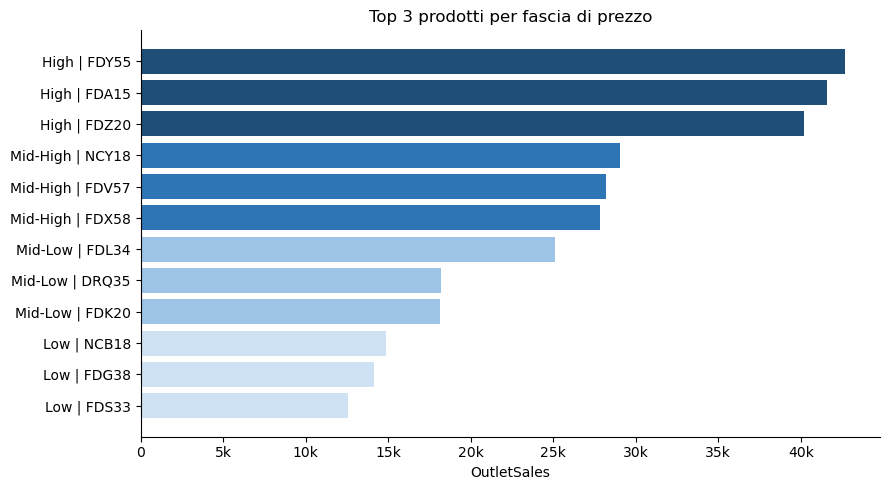

In [67]:
top_products_by_priceband_sorted['label'] = (
    top_products_by_priceband_sorted['PriceBand'].astype(str)
    + ' | '
    + top_products_by_priceband_sorted['ProductID']
)

plt.figure(figsize=(9, 5))
#assegno dei colori diversi per fascia
priceband_colors = {
    'High': '#1f4e79',      
    'Mid-High': '#2e75b6',  
    'Mid-Low': '#9dc3e6',    
    'Low': '#cfe2f3'}
colors = top_products_by_priceband_sorted['PriceBand'].map(priceband_colors)

plt.barh(
    top_products_by_priceband_sorted['label'],
    top_products_by_priceband_sorted['OutletSales'],
    color=colors)

ax = plt.gca()
format_sales_axis(ax, axis='x')

plt.xlabel('OutletSales')
plt.ylabel('')
plt.title('Top 3 prodotti per fascia di prezzo')

plt.gca().invert_yaxis()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [68]:
# dal grafico si nota come il prodotto FDL34 nonostante sia di fascia Mid-Low raggiunge un fatturato paragonabile a 
# quello dei prodotti di fascia Mid-High

In [69]:
# vorrei analizzare quanta % del fatturato deriva dalle fasce di prezzo dei prodotti
priceband_sales=df.groupby("PriceBand", observed=True)["OutletSales"].sum().sort_values(ascending=False)

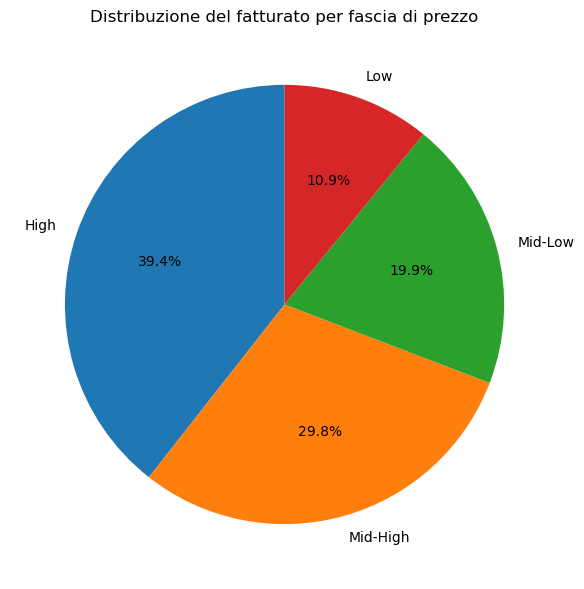

In [70]:
#creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(
    priceband_sales,
    labels=priceband_sales.index,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Distribuzione del fatturato per fascia di prezzo')
plt.tight_layout()
plt.show()

## Analisi per EUS (vendite stimate)

In [71]:
df.head(1)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,VisibilityZero,PriceBand,EstimatedUnitsSold,OutletAge
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14,False,High,14.95,26


In [72]:
# aggrego i volumi stimati per prodotto
Total_volume_est= df.groupby("ProductID")["EstimatedUnitsSold"].sum().sort_values(ascending=False)
print(Total_volume_est)

ProductID
NCL31    183.84
FDO19    183.07
FDW13    177.90
FDL34    177.80
FDJ21    173.10
          ...  
FDT35     11.01
NCR42      9.86
DRF48      7.95
FDY43      3.97
FDQ60      0.99
Name: EstimatedUnitsSold, Length: 1559, dtype: float64


In [73]:
#mostro solo la top10
top10_best_seller=Total_volume_est.head(10)

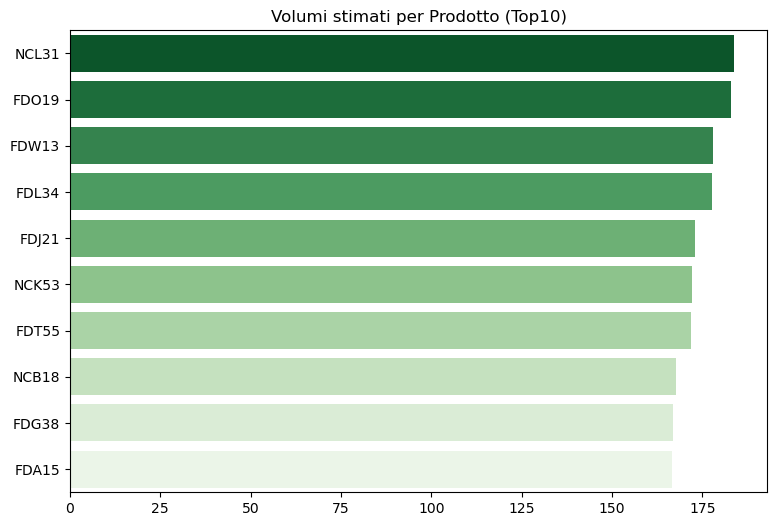

In [74]:
# Creazione del grafico
top10_best_seller_plot=top10_best_seller.reset_index()
plt.figure(figsize=(9, 6))
sns.barplot(x='EstimatedUnitsSold', y='ProductID', data=top10_best_seller_plot, hue='ProductID', palette='Greens_r')

plt.title("Volumi stimati per Prodotto (Top10)")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

In [75]:
# verifico la regola di Pareto, ovvero l'euristica secondo la quale l'80% delle vendite stimate è generato dal 20% degli SKU
pareto_volumes = df.groupby('ProductID')['EstimatedUnitsSold'].sum().sort_values(ascending=False).reset_index()

pareto_volumes['CumVolumes'] = pareto_volumes['EstimatedUnitsSold'].cumsum()
total_volumes = pareto_volumes['EstimatedUnitsSold'].sum()

pareto_volumes['CumPerc'] = pareto_volumes['CumVolumes'] / total_volumes * 100

In [76]:
EUS_pareto_80=pareto_volumes[pareto_volumes['CumPerc'] <= 80].shape[0] / pareto_volumes.shape[0]
EUS_pareto_80

0.6741500962155228

In [77]:
# in questo caso, si arriva al 80% delle vendite stimate grazie al 67.4% dei prodotti con EUS maggiore

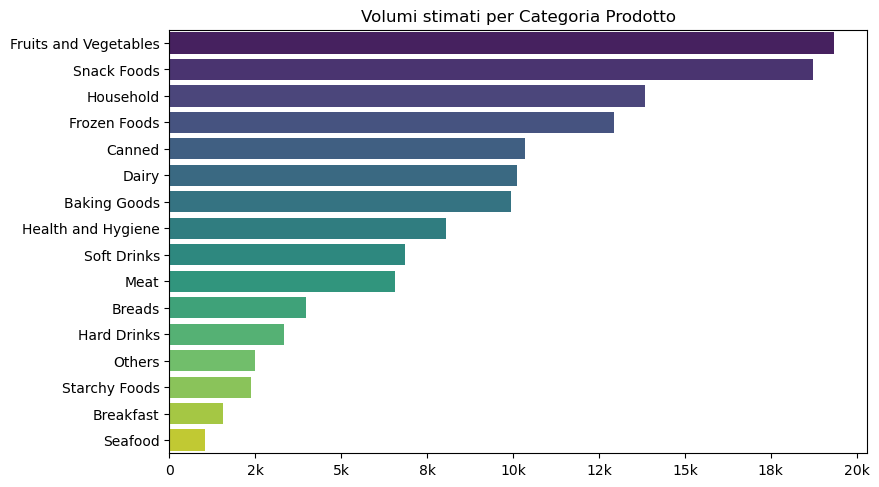

In [78]:
# Creazione del grafico volumi stimati per categoria
category_EUS=df.groupby("ProductType")["EstimatedUnitsSold"].sum().sort_values(ascending=False)
category_EUS_plot = category_EUS.reset_index()

plt.figure(figsize=(9, 5.5))
sns.barplot(x='EstimatedUnitsSold', y='ProductType', data=category_EUS_plot, hue='ProductType', palette='viridis')

ax = plt.gca()
format_sales_axis(ax, axis='x')
plt.title("Volumi stimati per Categoria Prodotto")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

In [79]:
# volume stimato per outlet
store_volumes=df.groupby("OutletID")["EstimatedUnitsSold"].sum().sort_values(ascending=False)
store_volumes

OutletID
OUT027    24879.52
OUT035    15785.79
OUT049    15466.20
OUT017    15427.03
OUT046    15057.83
OUT013    14913.29
OUT045    14475.89
OUT018    12854.41
OUT010     1322.69
OUT019     1290.79
Name: EstimatedUnitsSold, dtype: float64

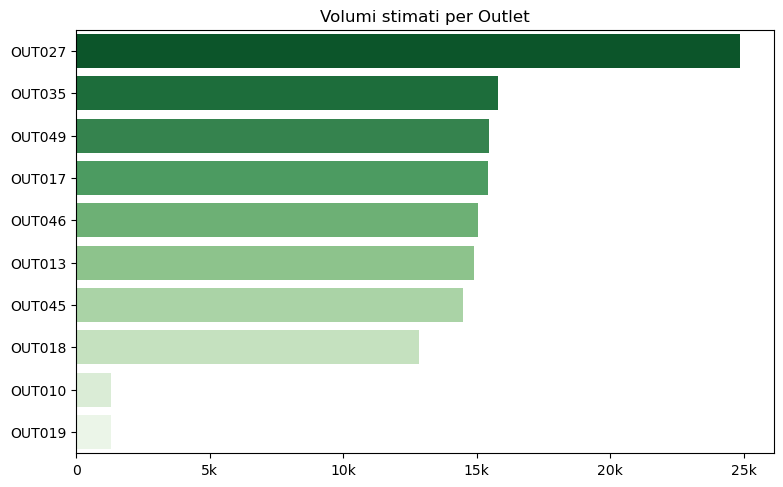

In [80]:
# Creazione del grafico
store_volumes_plot = store_volumes.reset_index()

plt.figure(figsize=(9, 5.5))
sns.barplot(x='EstimatedUnitsSold', y='OutletID', data=store_volumes_plot, hue='OutletID', palette='Greens_r')
ax = plt.gca()
format_sales_axis(ax, axis='x')
plt.title("Volumi stimati per Outlet")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

In [81]:
# Volumi stimati per tipologia
outlet_type_volumes=df.groupby("OutletType")["EstimatedUnitsSold"].sum().sort_values(ascending=False)
outlet_type_volumes

OutletType
Supermarket Type1    91126.03
Supermarket Type3    24879.52
Supermarket Type2    12854.41
Grocery Store         2613.48
Name: EstimatedUnitsSold, dtype: float64

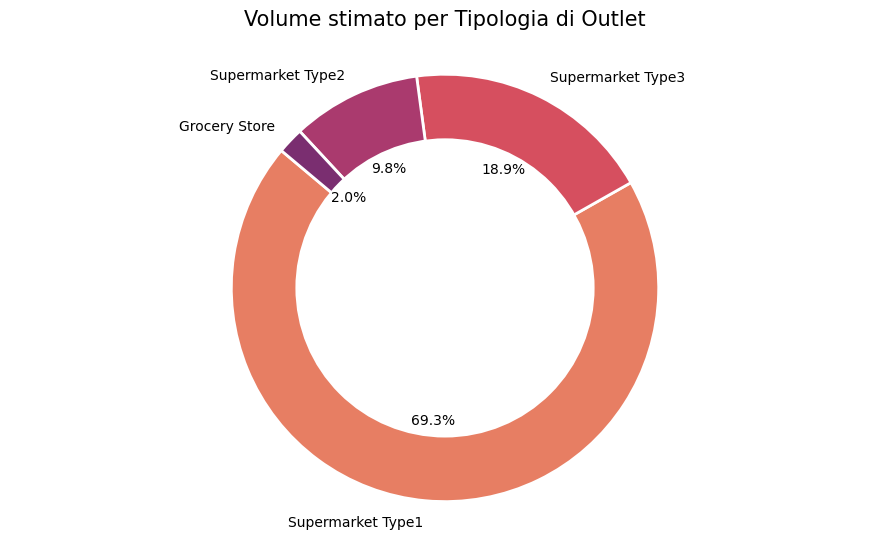

In [82]:
#creazione del grafico a torta
plt.figure(figsize=(9, 5.5))
colors = sns.color_palette("flare", n_colors=len(outlet_type_sales))

plt.pie(
    outlet_type_volumes, 
    labels=outlet_type_volumes.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.62,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2})

#Aggiunta di un cerchio al centro per renderlo un "Donut Chart"
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Volume stimato per Tipologia di Outlet", fontsize=15, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [83]:
# Volume stimato per locazione
location_type_volumes=df.groupby("LocationType")["EstimatedUnitsSold"].sum().sort_values(ascending=False)
location_type_volumes

LocationType
Tier 3    53969.91
Tier 2    45688.71
Tier 1    31814.82
Name: EstimatedUnitsSold, dtype: float64

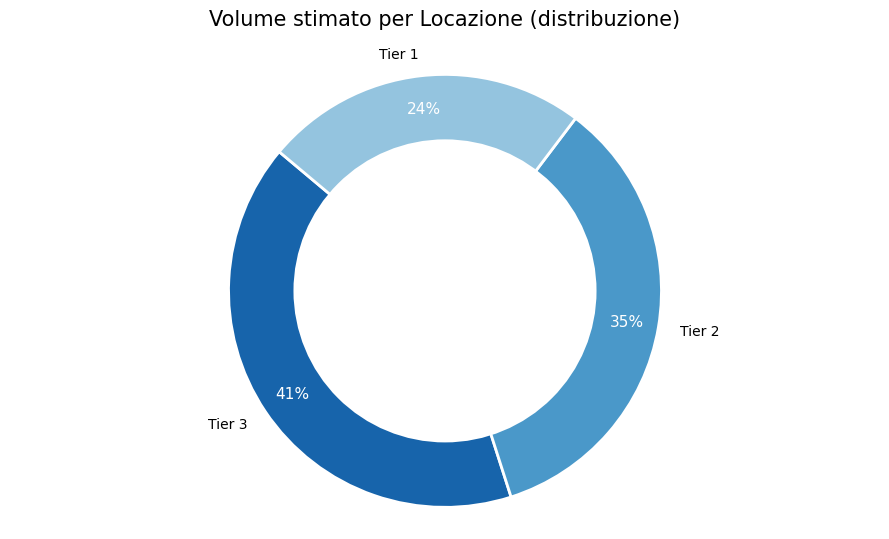

In [84]:
#creazione del grafico a torta
plt.figure(figsize=(9, 5.5))
colors = sns.color_palette("Blues_r", n_colors=len(outlet_type_sales))

wedges, texts, autotexts=plt.pie(
    location_type_volumes, 
    labels=location_type_volumes.index, 
    autopct='%1.0f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# scritte all'interno del grafico in bianco
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)
    
#Aggiunta di un cerchio al centro per renderlo un "Donut Chart"
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Volume stimato per Locazione (distribuzione)", fontsize=15, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [85]:
# su queste ultime features, l'analisi dei volumi stimati porta a risultati sovrapponibili con quelli dell'analisi sul fatturato

### Ranking per fascia di prezzo

In [86]:
# Individuazione dei Best Seller per fascia di prezzo
priceband_best_seller=df.groupby(["PriceBand","ProductID"], observed=True)["EstimatedUnitsSold"].sum().reset_index()
#creazione dei rank
priceband_best_seller['rank'] = (
    priceband_best_seller
    .groupby('PriceBand', observed=True)['EstimatedUnitsSold']
    .rank(method='dense', ascending=False))
#filtro per mostrare solo i 3 prodotti con volume di vendita stimato maggiore per ogni fascia di prezzo
best_seller_by_priceband = priceband_best_seller[priceband_best_seller['rank'] <= 3].sort_values(['PriceBand', 'rank'])
best_seller_by_priceband

,PriceBand,ProductID,EstimatedUnitsSold,rank
185,Low,FDO19,183.07,1.0
284,Low,FDW13,177.90,2.0
331,Low,NCB18,167.73,3.0
529,Mid-Low,FDL34,177.80,1.0
722,Mid-Low,NCK53,172.12,2.0
683,Mid-Low,FDZ35,153.57,3.0
1122,Mid-High,NCL31,183.84,1.0
907,Mid-High,FDJ21,173.10,2.0
1009,Mid-High,FDT55,171.79,3.0
1202,High,FDA15,166.62,1.0


In [87]:
# verifico che ciascun prodotto appartenga ad una sola fascia di prezzo
df.groupby('ProductID')['PriceBand'].nunique().value_counts()

PriceBand
1    1559
Name: count, dtype: int64

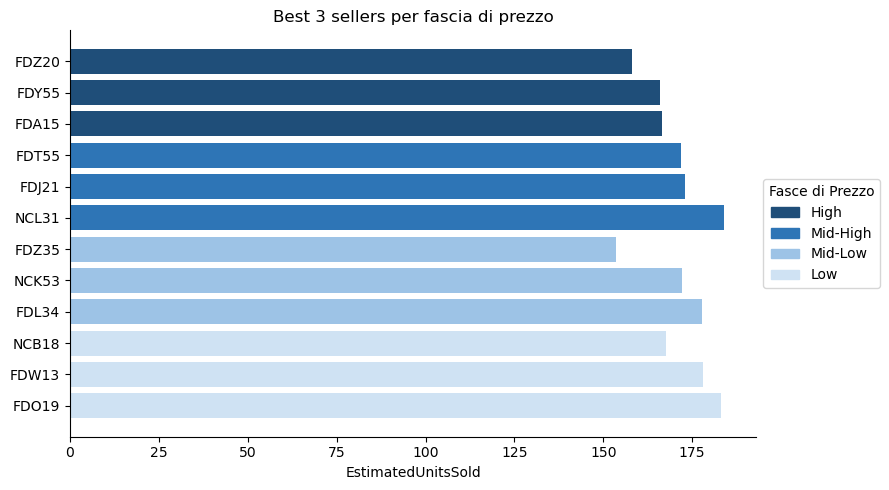

In [88]:
#creazione del grafico con legenda 
import matplotlib.patches as mpatches

plt.figure(figsize=(9, 5))
#assegno dei colori diversi per fascia
priceband_colors = {
    'High': '#1f4e79',      
    'Mid-High': '#2e75b6',  
    'Mid-Low': '#9dc3e6',    
    'Low': '#cfe2f3'         }
colors = best_seller_by_priceband['PriceBand'].map(priceband_colors)

plt.barh(
    best_seller_by_priceband['ProductID'],
    best_seller_by_priceband['EstimatedUnitsSold'],
    color=colors)
# Creazione della legenda
legend_handles = [
    mpatches.Patch(color=color, label=label) 
    for label, color in priceband_colors.items()]

# Aggiungiamo la legenda al grafico
plt.legend(handles=legend_handles, title="Fasce di Prezzo", bbox_to_anchor=(1, 0.5), loc='center left')
plt.xlabel('EstimatedUnitsSold')
plt.ylabel('')
plt.title('Best 3 sellers per fascia di prezzo')
#rimuovo gli assi a destra e in alto
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [89]:
# da questa analisi si vede che i 3 best seller per fascia hanno tutti volumi stimati simili compresi tra 158 e 184

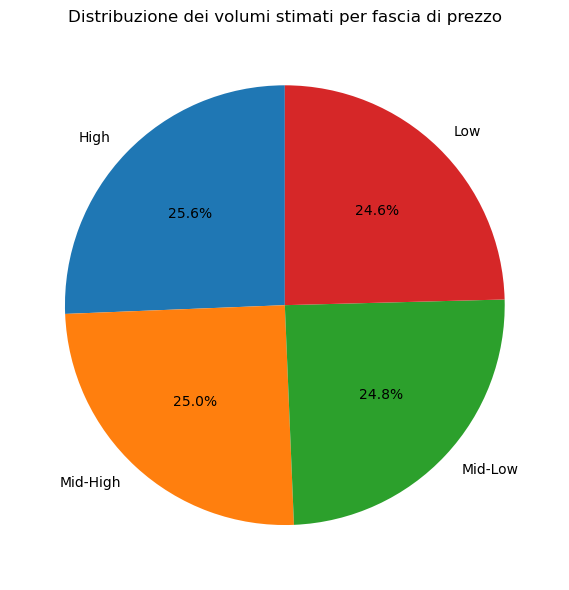

In [90]:
# analizzo quanta % dei volumi stimati deriva dalle fasce di prezzo
priceband_volumes=df.groupby("PriceBand", observed=True)["EstimatedUnitsSold"].sum().sort_values(ascending=False)

#creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(
    priceband_volumes,
    labels=priceband_sales.index,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Distribuzione dei volumi stimati per fascia di prezzo')
plt.tight_layout()
plt.show()

In [91]:
# proprio per come abbiamo definito i volumi stimati e le fasce di prezzo,
# era lecito aspettarsi una distribuzione quasi uniforme dei volumi per fascia di prezzo